<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل سوم: یادگیری، ارزیابی و تنطیم کردن مدل ها
    </font>
    <hr/>
    <font color=red size=6>
      مبحث:‌ارزیابی مدل ها
    </font>
    <hr/>
    <br>
      نویسنده:‌علیرضا حیدری
    <hr>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    روند کلی
  </font>
  <hr />
    در این نوتبوک با معیار های مختلف ارزیابی مدل ها در مسایل دسته بندی و رگرسیون آشنا می‌شویم
  <br/>
</font>
</div>


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با دیتاست
      </font>
      <hr />
      دیتاست ای که در این بخش استفاده خواهد شد، دیتاست MNIST است.
      <br />
      </font>
    </div>

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape

(70000, 784)

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
      همانطورکه مشخص است،‌داده ها عکس های ۲۸ در ۲۸ هستند
      </font>
      </div>


In [3]:
y.shape

(70000,)

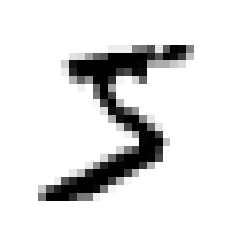

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
  

digit = X[0]
plot_digit(digit)

In [5]:
y[1401]

9

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    آموزش دادن یک Binary Classifier
  </font>
  <hr />
    در این بخش یک binary classifier که تشخیض می‌دهید یک عدد ۵ است یا نه را آموزش دهیم.
  <br/>
</font>
</div>

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
y_train_5

array([False, False, False, ..., False, False, False])

In [9]:
from sklearn.svm import SVC
svm_clf = SVC(C= 0.03, random_state=42)
svm_clf.fit(X_train, y_train_5)

SVC(C=0.03, random_state=42)

In [10]:
svm_clf.predict([digit])

array([ True])

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    محاسبه دقت
  </font>
  <hr />
    دقت این classifier را با کمک از accuracy_score به دست می‌آوریم.

   <br/>
</font>
</div>

In [11]:
from sklearn.metrics import accuracy_score
svm_clf_predictions = svm_clf.predict(X_test)
accuracy_score(y_test_5, svm_clf_predictions)

0.9729714285714286

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    به دقت بالای ۹۸ درصد رسیدیم! چقدر خوب!
      </font>
      </div>


  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    قبل از اینکه خیلی هیجان زده شوید،‌بگذارید تا یک مدل بسیار ساده را آموزش دهیم تا دقت آن را بسنجیم.
      </font>
      </div>


  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    این مدل به گونه ای کار می‌کند که هر عکسی ببیند، آن را دسته "غیر ۵" می‌گذارد
      </font>
      </div>


In [12]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [13]:
never_5_clf = Never5Classifier()
never_5_clf_predictions = never_5_clf.predict(X_test)
accuracy_score(y_test_5, never_5_clf_predictions)

0.9081714285714285

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
خب همانطور که مشخص است این دسته بند، به دقت بالای ۹۰ درصد رسید! خیلی هم تعجب برانگیر نیست، زیرا حدود ۱۰ درصد از داده ها لیبل شان ۵ بوده است، و آن ها اشتباه تشخیص داده شده اند.
      </font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
بنابراین، accuracy همیشه یه متریک خوب برای ارزیابی مدل ها نیست.
      </font>
      </div>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    Confusion Matrix
  </font>
  <hr />
    یک روش خیلی بهتر برای ارزیابی مدل،‌نگاه به confusion matrix است که به ما نشان می‌دهد که هر دسته چند بار در دسته درست و چند بار در دسته های اشتباه دسته بندی شده است

   <br/>
</font>
</div>

  <div dir=rtl id="dataset">

<font face="XB Zar" size=4>
    هر سطر در این ماترسی نشان دهنده کلاس واقعی و هر ستون نشان دهنده کلاسی است که مدل پیش‌بینی کرده است.
      </font>
      </div>


In [14]:
from sklearn.metrics import confusion_matrix

svm_confusion_matrix = confusion_matrix(y_test_5, svm_clf_predictions)
svm_confusion_matrix

array([[15887,     6],
       [  467,  1140]])

<div dir=rtl id="dataset">
<font face="XB Zar" size=4>
اطلاعاتی که confusion matrix از SGDClassifier به ما می‌دهد عبارت هستند از:
          <ul>
            <font face="Roboto">
              <li>
                اندیس [0,0]: ۱۵۸۸۱ عکسی که لیبل آن ها "غیر ۵" بوده است به درستی "غیر ۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [0,1]: ۱۲ عکسی که لیبل آن ها "غیر ۵" بوده است به اشتباه "۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [1,0]: ۲۱۱ عکسی که لیبل آن ها "۵" بوده است به اشتباه "غیر ۵" تشخیص داده شده اند.
              </li>
              <li>
                اندیس [1,1]: ۱۳۹۶ عکسی که لیبل آن ها "۵" بوده است به درستی "۵" تشخیص داده شده اند.
              </li>
            </font>
          </ul>
</font>
</div>


In [15]:
y_train_perfect_predictions = y_train_5 = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[47794,     0],
       [    0,  4706]])

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
برای یک دسته بند ایده آل، خانه های غیر قطری confusion matrix همگی ۰ هستند.
</font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
همانطور که متوجه شده اید، confusion matrix اطلاعات زیادی به ما می‌دهد. یکی از آن ها، دقت پیش‌بینی های positive .است که به آن precision می‌گوییم
</font>
      </div>


<br><center>  $ Precision = \frac{TP}{TP + FP} $

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
اگر یک پیش بینی انجام دهیم که positive باشد، آنگاه presision برابر با ۱ می‌شود. به همین دلیل این متریک را با متریک دیگری به اسم recall  می‌سنجیم:
</font>
      </div>


<br><center>  $ Recall (sensitivity) = \frac{TP}{TP + FN} $

In [16]:
from sklearn.metrics import precision_score, recall_score
svm_y_train_pred = svm_clf.predict(X_train)
print('precision', precision_score(y_train_5, svm_y_train_pred))
print('recall', recall_score(y_train_5, svm_y_train_pred))

precision 0.9943045563549161
recall 0.704844878878028


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
دسته بند ما الان آنقدر هم خوب بنظر نمی‌آید! این دسته بند ۸۶ درصد عکس هایی که ۵ بوده است را درست دسته بندی کرده است.
</font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
یک معیار دیگر که برای ارزیابی مدل استفاده می‌شود، F1 score نام دارد که به شکل زیر تعریف می‌شود:
</font>
      </div>


<br><center>  $ F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} $

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, svm_y_train_pred)

0.8249191743347426

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
این متریک دسته بند هایی که precision و recall نزدیکی دارند را دوست دارد. استفاده از این متریک خیلی وابسته به مساله است. ممکن است در یک مساله precision برای ما اهمیت زیادی داشته باشد یا در مساله دیگری بخواهیم recall بالایی داشته باشیم.
</font>
      </div>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    Precision/Recall tradeoff
  </font>

</font>
</div>

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
دسته بند ها،‌برای هر داده که دسته بندی می‌کنند، یک score مشخص می‌کنند و بر اساس یک threshold آن را به دسته مثبت یا دسته منفی اختصاص می‌دهند.
</font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
به طور مثال برای این دسته بند،‌این threshold برابر با ۰ می‌باشد. با جابجایی این threshold، پیشبینی های عوض می‌شود و بنابراین،‌متریک ها هم عوض می‌شوند و precision و recall  های متفاوتی خواهیم داشت.
</font>
      </div>


In [18]:
svm_train_scores = svm_clf.decision_function(X_train)

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, svm_train_scores)

In [20]:
thresholds

array([-2.82740324, -2.72198694, -2.66664357, ...,  1.85226769,
        1.89011781,  1.96884864])

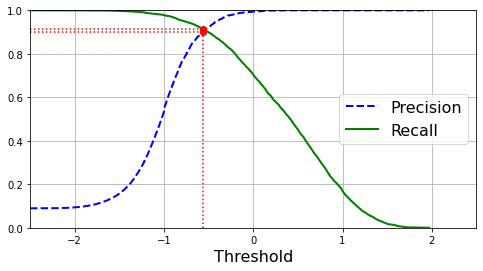

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-2.5, 2.5, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-2.5, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-2.5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
همانطور که از نمودار بالا مشخص است،‌با جابجا کردن این threshold، نمیتوان هم precisionرا زیاد کرد و هم recall را زیاد کرد. و این جا این مساله مطرح می‌شود که این threshold را در کجا قرار دهیم،‌که جواب این سوال،‌وابسته به مساله است.
</font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
همچنین می‌توان نمودار precision برحسب recall را کشید و از روی آن تصمیم گیری کرد:
</font>
      </div>


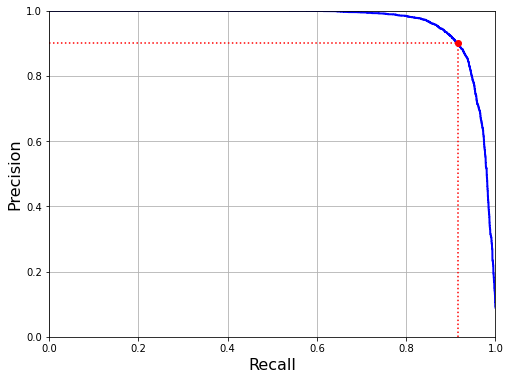

In [22]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
حال بطور مثال در مساله ای که داریم،‌می‌خواهیم حتمابه recall برابر با ۹۰ درصد برسیم. کاری که انجام می‌دهیم بصورت زیر است:
</font>
      </div>


In [23]:
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]
threshold_90_recall

-2.8274032359600163

In [24]:
svm_y_train_pred_90 = (svm_train_scores >= threshold_90_precision)

In [25]:
precision_score(y_train_5, svm_y_train_pred_90)

0.9001044932079415

In [26]:
recall_score(y_train_5, svm_y_train_pred_90)


0.9152146196345091

<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
    ROC Curve
  </font>

</font>
</div>

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
این ابزار نیز برای دسته بند های باینری زیاد استفاده می‌شود. و خیلی شبیه به precision-recall curve می‌باشد، با این تفاوت که recall  را بر حسب false positive rate می‌کشد.
</font>
      </div>


In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, svm_train_scores)

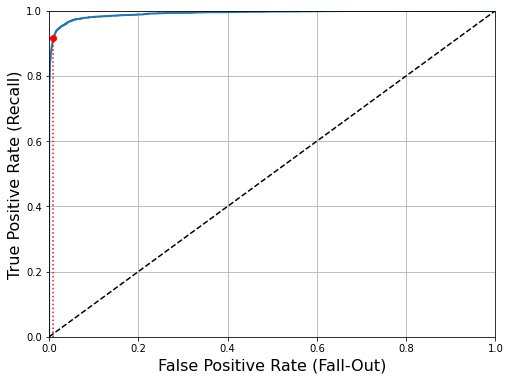

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
در این جا هم یک tradeoff بین recall و false positive rate داریم.
خط چین نمایش داده شده برای یک دسته بند کاملا رندوم است و یک دسته بند خوب،‌ در دورترین حالت نسبت به آن خط چین است.
</font>
      </div>


<div dir=rtl id="Abstract">
<font face="XB Zar" size=4>
  <font color="red" size=5>
   AUC
  </font>

</font>
</div>

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
یک راه دیگر برای ارزیابی و مقایسه مدل ها،‌مقایسه کردن مساحت زیر نمودار ROC Curve است که به این متریک،‌AUC گفته می‌شود.
    </font>
      </div>


In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, svm_train_scores)

0.9916184997517591

<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
این متریک برای دسته بند SVM ما عدد بالایی است!
    </font>
      </div>


<div dir=rtl id="dataset">

<font face="XB Zar" size=4>
حال یک دسته بند دیگر در نظر می‌گیریم و روی داده ها آموزش می‌دهیم و سپس آن را با SVM ای که داشتیم، مقایسه می‌کنیم.
</font>
      </div>


In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train_5)
y_probas_forest = forest_clf.predict(X_train)

In [31]:
y_probas_forest = forest_clf.predict_proba(X_train)
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

In [32]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


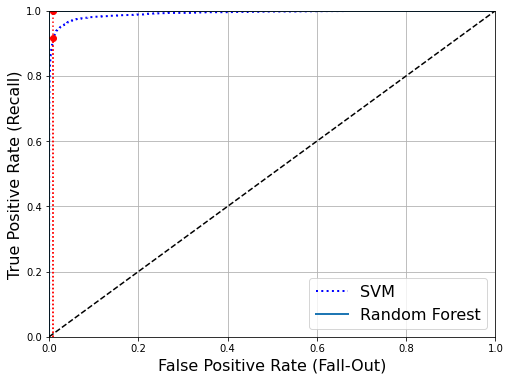

In [33]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SVM")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()